# Practica 2

El objetivo principal de esta clase es ponernos al dia con las herramientas básicas de manejo de arrays y de ploteo de gráficos que vamos a utilizar para estudiar el desarrollo de modelos de aprendizaje automático. Dentro de las muchas herramientas, sobresalen las bibliotecas Numpy y Matplotlib, la primera para representación y operación algebraica de datos numéricos, y la segunda para confección de gráficos. Para dar un primer ejemplo de su utilización, vamos a plantear un problema de regresión simple, el cual vamos a revisitar en clases teóricas y prácticas subsiguientes. 

# Herramientas de software
- Python como lenguaje de programación
- IDEs como herramienta principal de desarrollo de código
    - Spyder (nativo de Anaconda)
    - VSCode (Microsoft)
    - vim? emacs? editores de texto?
- Interpretes interactivos
    - IPython
- Gestor de paquetes
    - pip
    - conda 
- Environmetns

Entonces... que es [Anaconda](https://www.anaconda.com/download) y porque recomendamos utilizarlo? 

### Rutinas para generación de datos

Cada vez que sumemos un concepto nuevo nos va a interesar ponerlo a prueba sobre algún dataset. Para estas pruebas de concepto, nos interesa poder generar datos que cumplan con dos requisitos básicos:
   - Poder controlar/conocer el principio según el cual se generan
   - Asegurarnos la repetitibilidad de la generación

Para ello, la libreria Numpy nos permite trabajar con un objeto generador que nos brinda varias rutinas. Para poder asegurarnos la repetibilidad de la generación definimos un parámetro **seed**, el cual define la inicialización de los generadores aleatorios que funcionan por detras de este objeto. Es común utilizar el número 42, pero les dejamos a ustedes averiguar el porque. 

In [38]:
import numpy as np

In [39]:
generator = np.random.RandomState(seed=42)

In [40]:
generator.standard_normal(size=4)

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986])

que sea repetible quiere decir que si vuelvo a generar 4 valores debería obtener los mismos 4? Veamos.

In [41]:
generator.standard_normal(size=4)

array([-0.23415337, -0.23413696,  1.57921282,  0.76743473])

tenemos mas rutinas, y podemos pasarle mas parámetros. Por ejemplo, para una distribución uniforme, podemos especificar los limites inferior y superior:

In [42]:
generator.uniform(low=0, high=10, size=4)

array([0.20584494, 9.69909852, 8.32442641, 2.12339111])

para mas información, pueden revisar la [documentación oficial](https://numpy.org/doc/1.14/reference/generated/numpy.random.RandomState.html)

## Regresion - Curva senoidal

Para revisar las herramientas de codigo, vamos a desarrollar un ejemplo de regresión simple.
Como se trata de aprendizaje supervisado, matemáticamente podemos generalizar al problema como la búsqueda de una función $h$ que nos permita pasar de un conjunto de valores $X$ (datos de entrada) a otro conjunto de valores $Y$(valores objetivos o datos de salida eperados). 

$$h:X \rightarrow Y$$

En la vida real nunca sabemos cual es la mejor función $h$, es decir, la función que mejor generaliza la relación entre los conjuntos $X$ e $Y$. Para este ejemplo, nosotros vamos a controlar cual es esta función ideal, a la cual vamos a llamar $f$, y vamos a hacer que consista en una función senoidal:

$$f(x)=sin(2 \pi x)$$

Para mayor facilidad, vamos a acotar el dominio de X al intervalo $[0,1]$, y vamos a tomar $N$ observaciones. Para el conjunto Y, vamos a calcular el valor de nuestra función ideal $f$ para estos $N$ valores, y vamos a sumarles ruido gaussiano. De esta manera imitamos la presencia de ruido en las muestras que encontramos cuando trabajamos con datasets reales.  

In [82]:
def ground_truth_fn(x):
    return np.sin(2*np.pi*x)

In [43]:
N = 10
noise = 0.1
X_interval = (0,1)
X = generator.uniform(*X_interval, size=N)

In [45]:
Y_true = ground_truth_fn(X)
Y = Y_true + 0.1*generator.standard_normal(Y_true.shape)

Como vamos a querer repetir este proceso varias veces, podemos definir una función que resuelva esta tarea:

In [85]:
def get_data(N=10, noise=0.1, X_interval=(0,1), gt_fn=None):
    if not gt_fn:
        raise ValueError("You must define a ground truth function")
    X = generator.uniform(*X_interval, size=N)
    Y_true = gt_fn(X)
    Y = Y_true + 0.1*generator.standard_normal(Y_true.shape)
    return X, Y, Y_true

In [86]:
X, Y, Y_true = get_data(gt_fn=ground_truth_fn)

Para comenzar a visualizar estas curvas y puntos, vamos a utilizar la biblioteca *Matplotlib*. La misma es un estandar dentro de este campo, y nos va a permitir visualizar datos de muchos dominios, en distintas dimensiones y formatos. Se puede utilizar a través de dos interfaces principales, la API de pyplot y la API orientada a objetos. La primera opción es mas sencilla de aprender a utilizar, pero a su vez es mas limitada. La segunda opción nos permite liberar toda la capacidad de la libreria para personalizar y controlar los graficos generados. Lo común es comenzar utilizando la API de pyplot, como vamos a hacer en estos ejemplos, pero luego internalizar la API orientada a objetos. Veamos como podemos graficar esta función $f$ y la muestras $X$ tomadas con esta herramienta:

In [87]:
import matplotlib.pyplot as plt

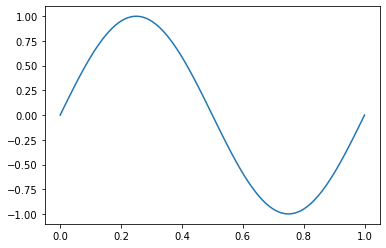

In [88]:
x_true_plot = np.linspace(0,1,100, endpoint=True)
y_true_plot = ground_truth_fn(x_true_plot)
plt.plot(x_true_plot, y_true_plot)
plt.show()

Esta es la manera mas sencilla y durecta de utilizar Matplotlib, pero tenemos que ir un poco mas en profundidad. La visualización de datos es una cuestión crucial tanto como para el desarrollo de sistemas, como para la documentación y divulgación de resultados. Es por eso que pretendemos que con el pasar de las clases desarrollemos un criterio de buenas practicas de graficación, en donde deberemos considerar cuales son los elementos con los que debe contar un gráfico para poder ser interpretado correctamente. Lo primero es comprender que información necesitamos sumar a un gráfico y porque. Luego, revisando los apuntes propuestos por la cátedra, revisando la documentación oficial, mediante busquedas en internet o consultando con los docentes (en ese orden preferentemente) van a poder modificar los graficos según su conveniencia. Por ahora, sumemos algunas cosas básicas para seguir con el ejemplo, utilizando esta misma API.  

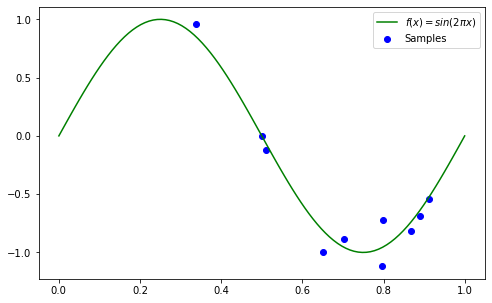

In [89]:
plt.figure(figsize=(8,5))
plt.plot(x_true_plot, y_true_plot, label='$f(x) = sin(2 \pi x)$', color='green')
plt.scatter(X, Y, marker='o', color='blue', label='Samples',)
plt.legend()
plt.show()

Entonces, comenzamos a buscar funciones que nos sirvan para predecir $Y$ a partir de $X$. El primer aproximamiento naturalmente puede ser un polinomio de orden $M$:

$$h(x, w) = w_{0} + w_{1}x + w_{2}x^{2}+ ... + w_{M}x^{M} = \sum_{j=o}^{M}w_{j}x^{j}$$

Este es un modelo lineal, lo que debería despertar algunas dudas porque vemos coeficientes elevados a potencias eventualmente mayores que 1... nos referimos a que el modelo es lineal en relación a los *parámetros ajustables del modelo*.
Ahora necesitamos determinar los valores de los coeficientes $w_{j}$, quienes definen el comportamiento de la función $h$. Anteriormente dijimos que queriamos encontrar una buena función $h$, y que por "buena" entendemos que es buena estimando los valores de $Y$ a partir de $X$. Entonces, para medir "que tan buena" es esta función necesito definir una manera de medir que tan bien estima estos valores. Para ello utilizamos una **función de error**, que podemos definir a nuestra conveniencia. Una opción usual es utilizar la suma cuadrática de las diferencias entre las predicciones $\hat{Y}$ y los valores objetivos $Y$


$$E(W) = \frac{1}{2} \sum_{j=1}^{N}[h(x_{j}, w)-y_{j}]^{2} = \frac{1}{2} \sum_{n=1}^{N}[\hat{y}_{j}-y_{j}]^{2} $$

In [90]:
def err_fn(y_true, y_pred):
    return 0.5*np.sum((y_true-y_pred)**2)

Entonces, resolver este problema es equivalente a minimizar esta función, es decir, correr un proceso de optimización en donde encuentre el conjunto de parámetros $W$ que minimizen $E(W)$. 
Como la función de error es cuadrática respecto a los coeficientes $W$, sus derivadas seran lineales con respecto a $W$, entonces la minimización de la función de error tiene una única solución $W^{*}$.
Como este modelo es simple, podemos utilizar las ecuaciones algebraicas clasicas de cuadrados minimos para resolver el problema de optimización. Mas adelante vamos a ver otra metodologia mas general.

In [91]:
M = 1 # orden del polinomio

In [92]:
def get_best_coef(X, Y, M):
    A = np.zeros((M, M)) # matriz de coeficientes
    S = np.zeros(2*M)
    b = np.zeros(M) # vector de resultados
    for i in range(len(X)):
        aux = Y[i]
        for j in range(M):
            b[j] = b[j]+aux
            aux = aux*X[i]
        aux = 1.0
        for j in range(2*M):
            S[j] = S[j]+aux
            aux = aux*X[i]
    for i in range(M):
        for j in range(M):
            A[i,j] = S[i+j]
            
    x = np.linalg.solve(A, b)
    assert np.allclose(np.dot(A, x), b)
    return x

In [94]:
x = get_best_coef(X, Y, M)
poly = np.polynomial.polynomial.Polynomial(x)

In [95]:
y_pred_plot = poly(x_true_plot)

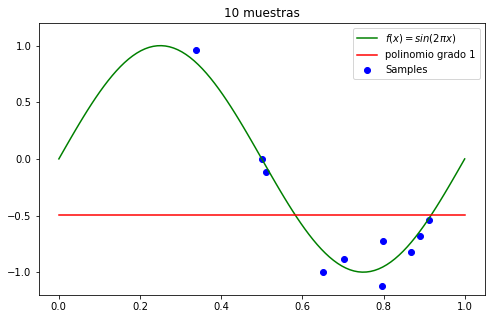

In [97]:
plt.figure(figsize=(8,5))
plt.title(f'{N} muestras')
plt.plot(x_true_plot, y_true_plot, label='$f(x) = sin(2 \pi x)$', color='green')
plt.plot(x_true_plot, y_pred_plot, label=f'polinomio grado {M}', color='red')
plt.scatter(X, Y, marker='o', color='blue', label='Samples',)
plt.legend()
plt.ylim(-1.2,1.2)
plt.show()

### 💻 Ejercicio [overfitting-underfitting]
Generar una secuencia de gráficos para distintos grados de polinomios, desde M=1 hasta M = 10, para el mismo ejemplo de 10 muestras.

Entonces, como nuestro objetivo final es siempre la generalización del modelo, podemos considerar un nuevo conjunto de datos que NO se utilizan para elegir el modelo (determinar el valor de los parámetros $W$) sino que solo se utilizan para evaluar el funcionamiento del modelo en datos que no haya visto antes. Entonces, para cada grado M de polinomio, podemos calcular el error sobre los datos de train, y el error sobre los datos de testeo o evaluación. Muchas veces es conveniente utilizar la version cuadrática media del error definido anteriormente, para poder comparar distintos tamaños de datasets al estar normalizado, y además la raiz nos devuelve el error en las mismas unidades y escala que el valor que busca estimar el modelo. Para un caso de magnitudes reales, este error es mas interpretable. 

In [194]:
def rms_err(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    N = len(y_true)
    e_w = err_fn(y_true, y_pred)
    return np.sqrt((2*e_w)/(N))

In [195]:
X, Y, Y_true = get_data(N=10, gt_fn=ground_truth_fn)
X_test, Y_test, Y_true_test = get_data(N=100, gt_fn=ground_truth_fn)

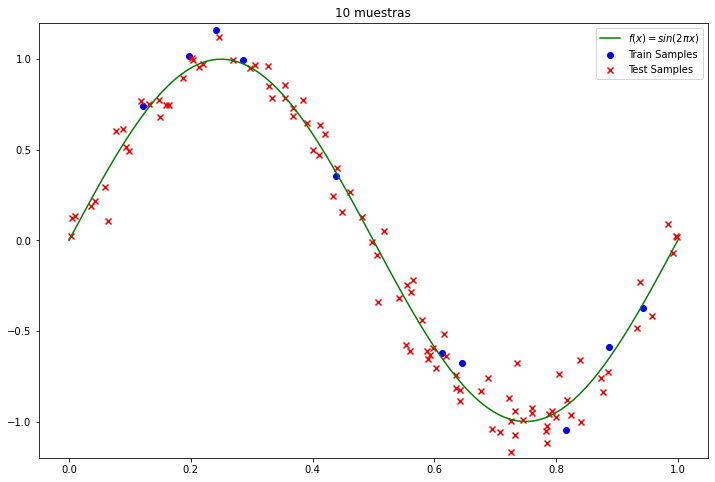

In [196]:
plt.figure(figsize=(12,8))
plt.title(f'{N} muestras')
plt.plot(x_true_plot, y_true_plot, label='$f(x) = sin(2 \pi x)$', color='green')
plt.scatter(X, Y, marker='o', color='blue', label='Train Samples',)
plt.scatter(X_test, Y_test, marker='x', color='red', label='Test Samples',)
plt.legend()
plt.ylim(-1.2,1.2)
plt.show()

### 💻 Ejercicio [training vs test error]
Para estos conjuntos de entrenamiento y de testeo, fitear el modelo con distintos grados M desde 1 hasta 10, y graficar el error en entrenamiento y en testeo.

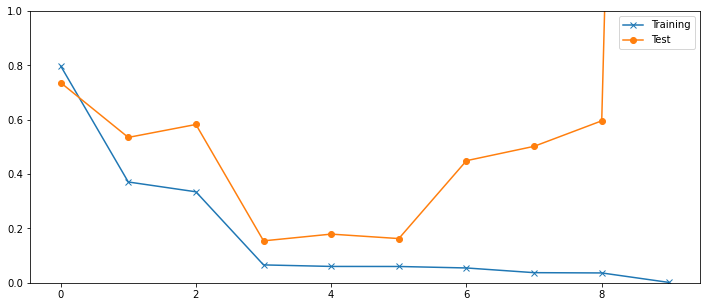

En este punto, como sabemos que los datos se generarn siguiendo una función senoidal, podriamos esperar que el modelo que mejor generalize sobre estos datos sea el que mas se asimile a una función senoidal.
Por otro lado, de lo anterior podemos concluir que luego de un cierto punto, sumar mas términos en el polinomio no me permite lograr una mejor generalización, sino que genera overfitting. Pero sabemos que podemos aproximar una señal senoidal a través de un polinomio de expansión en serie, por lo cual podriamos esperar que el rendimiento mejore a medida que aumenta el grado del polinomio...

## Algunas conclusiones
- Un modelo de regresión lineal con mucha complejidad sobre pocos datos genera overfitting
- Aumentar la cantidad de datos para un mismo modelo mejora la condición de overfitting
- La necesidad de setear la complejidad del modelo o el número de parámetros (no son siempre sinónimos directos) respecto a la cantidad de datos no parece algo deseable, y es un problema tipico de este tipo de estimación por minimos cuadrados.
- La inferencia bayesiana soluciona este clase de problemas de overfitting por sobre-complejidad del modelo

## Algunas preguntas
   - Como escala este modelo con los datos?
   - Como escala este modelo con la cantidad de parámetros?

# Datos - Splits 
Imagenes extraidas de [Rashcka, S., "Model Evaluation, Model Selection, and Algorithm
Selection in Machine Learning", (2018)](https://arxiv.org/pdf/1811.12808.pdf)

Lo común es que trabajemos los datasets en formato de **Pandas DataFrame**. Este objeto podemos pensarlo como un conjunto de sub-objetos llamados **Series** que combinan la versatilidad de un array de numpy con otras propiedades de tablas propias del dataframe. De esta manera, es sencillo pensar a nuestro dataset de forma tabular, y explotar esta representación para definir splits, analizar propiedades presenta en la metadata de los datos, y sobre todo para escribir/leer estas listas de manera eficiente. 

In [233]:
data = pd.read_pickle('toy_dataset.pkl')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Digamos que la tarea en cuestión es predecir cual sera el largo del petalo (Y) sabiendo cual es el ancho del petalo (X).

## División estandar train-val-test
   - Suficiente cantidad de datos
   - El dev set lo puedo manejar como mas me convenga

 para este primer ejemplo, vamos a tomar 80% del dataset como dev set, y 20% como test set. 

In [250]:
data_dev = data.sample(frac=0.8)
data_test = data.drop(data_dev.index)
data_train = data_dev.sample(frac=0.8)
data_val = data_dev.drop(data_train.index)

## Cross-validation
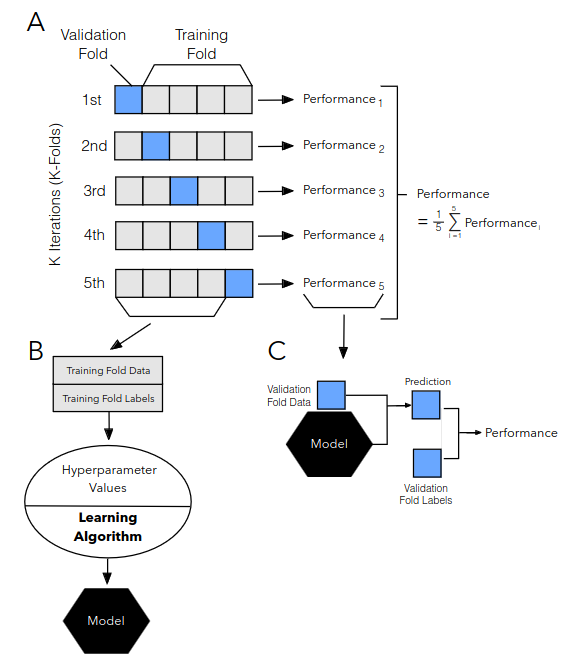

   - kfoldCV, LOOCV
   - un modelo por cada fold
   - NO SE PROMEDIA EL RENDIMIENTO EN CADA FOLD!
   - el mejor modelo se entrena en todo DEV
       - Significancia estadística
   - se testea el mejor modelo entrenado en el mayor set de datos
   - el problema suele ser que el set de testeo sigue siendo pequeño
       - nested crossvalidation

### 💻 Ejercicio [k-fold]
Definir cual es la mejor manera de formar folds en este caso (tamaño, selección), e implementar el bucle de entrenamiento

## Bootstrapping
- Suele estar mas asociado a los cálculos de significancia estadística (IC)
- Distintos val sets
- Controlamos la cantidad de bootstrapping (puedo hacer esto con CV?)
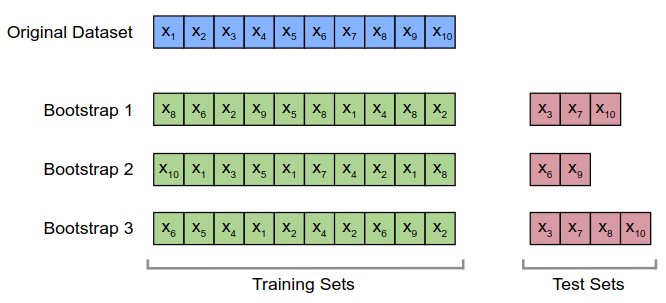

    $$\frac{1}{k}\sum_{k=1}^{K}\frac{1}{B^{-k}}\sum_{b \in B^{-k}}L(y_{i}, \hat{f}_{b}(x_{i}))$$

# Preprocesamiento
- Para todo pre-procesamiento que requiera calcular estadísticos, estos deben calcularse sobre los datos de entrenamiento solamente. Ejemplos: normalización, selección de features, etc.
- Una buena practica consiste en diseñar el código para que las funciones de entrenamiento solo vean los datos de entrenamiento.
- Si usamos CV o bootstrapping, eso implica que las estadísticas cambian para cada modelo entrenado. 

# Bias - Variance tradeoff
- Modelos simples muestran alto bias y poca varianza.
- Modelos complejos muestran bajo bias y mucha varianza.
- La varianza la puedo evaluar como la diferencia de performance entre dev y test sets.
- El bias lo puedo evaluar como la cantidad de error sobre el dev set. 
- Existen metodos para encontrar el balance adecuado para la complejidad del modelo: regularización, boosting y bagging.

# Como va a comportarse el modelo en la práctica?
   - Probablemente levemente mejor que lo que calculamos para en los datos de evaluación
   - Nuestro rendimiento estimado tiene un sesgo pesimista por estar entrenado en menos datos
       - Podemos estimar cuan pesimista es nuestra estimación del rendimiento haciendo curvas de rendimiento vs tamaño del set de entrenamiento (learning curves)
        
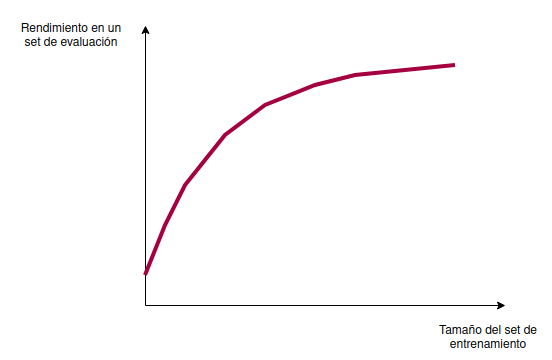